# Imports and Data Upload

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [50]:
finals = pd.read_csv("data/final_exam.csv")
longexam = pd.read_csv("data/long_exam.csv")
longquiz = pd.read_csv("data/long_quiz.csv")
absences = pd.read_csv("data/absences.csv")

# Preprocessing Data

## Final Exams

In [51]:
finals = finals[['percent']]

In [52]:
finals.head()

,percent
0,92.50
1,77.50
2,42.50
3,43.75
4,57.50


## Long Exams

In [53]:
longexam['firstperc'] = longexam['first']/longexam['firstmax']
longexam['secondperc'] = longexam['second']/longexam['secondmax']
longexam['thirdperc'] = longexam['third']/longexam['thirdmax']
longexam['true_ave'] = (longexam['firstperc'] + longexam['secondperc'] + longexam['thirdperc'])*100/3

In [54]:
longexam = longexam[['firstperc', 'secondperc', 'thirdperc', 'true_ave']]

In [55]:
longexam.head()

,firstperc,secondperc,thirdperc,true_ave
0,0.92,0.600,0.84,78.666667
1,0.54,0.725,0.52,59.500000
2,0.46,0.625,0.56,54.833333
3,0.62,0.275,0.58,49.166667
4,0.44,0.375,0.30,37.166667


## Long Quizzes

In [80]:
longquiz['firstperc'] = longquiz['first ']/longquiz['firstmax']
longquiz['secondperc'] = longquiz['second']/longquiz['secondmax']
longquiz['thirdperc'] = longquiz['third']/longquiz['thirdmax']
longquiz['fourthperc'] = longquiz['fourth']/longquiz['fourthmax']
longquiz['true_ave'] = (longquiz.firstperc + longquiz.secondperc + longquiz.thirdperc + longquiz.fourthperc)*100/4

In [82]:
longquiz = longquiz[['firstperc', 'secondperc', 'thirdperc', 'fourthperc', 'true_ave']]

In [83]:
longquiz.head()

,firstperc,secondperc,thirdperc,fourthperc,true_ave
0,0.725,0.700,0.600,0.775,70.000
1,0.725,0.650,0.500,0.675,63.750
2,0.600,0.575,0.450,0.450,51.875
3,0.550,0.550,0.275,0.575,48.750
4,0.575,0.550,0.275,0.500,47.500


## Absences

In [60]:
absences.head()

,absences
0,4
1,1
2,4
3,4
4,0


# Data Visualization

## Long Quiz Scores and Long Exam Scores

## Average of Long Quiz Scores and Average Long Exam Scores

## Average of Long Quiz Scores and Final Exam Scores

## Average of Long Exam Scores and Final Exam

## Student Absences and Long Quiz Scores

## Student Absences and Long Exam Scores

## Student Absences and Average of Long Quiz Scores

In [84]:
gx = absences.absences.tolist()
gy = longquiz.true_ave.tolist()

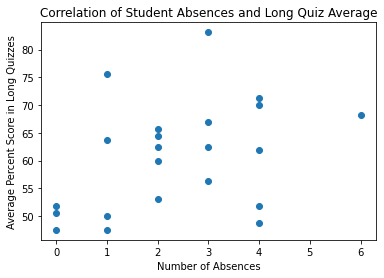

In [85]:
plt.scatter(gx, gy)
plt.ylabel('Average Percent Score in Long Quizzes')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Quiz Average')
plt.show()

## Student Absences and Average of Long Exam Scores

In [71]:
hx = absences.absences.tolist()
hy = longexam.true_ave.tolist()

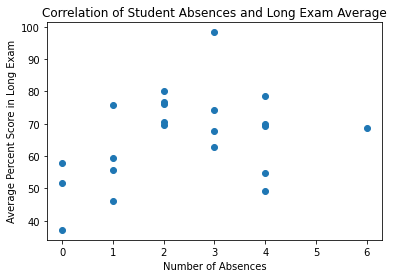

In [73]:
plt.scatter(hx, hy)
plt.ylabel('Average Percent Score in Long Exams')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Exam Average')
plt.show()

## Student Absences and Final Exam Scores

In [63]:
ix = absences.absences.tolist()
iy = finals.percent.tolist()

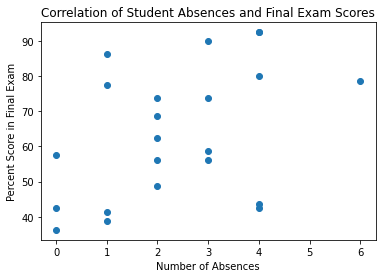

In [70]:
plt.scatter(ix, iy)
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Final Exam Scores')
plt.show()